<a href="https://colab.research.google.com/github/shivarjunchaturvedi/RetailSalesPrediction-ML-Project/blob/main/Retail_Sales_Prediction_YBI_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retail Sales Prediction — YBI Foundation Internship Project

Author: Shivarjun Chaturvedi (Shivay)
Objective: Predict retail sales using machine learning.
Tools Used: Google Colab, Python, Pandas, NumPy, Matplotlib, Scikit-Learn
Dataset Source: YBI Foundation GitHub (RetailSales.csv)

This project includes:

Data loading

Data cleaning

Exploratory Data Analysis (EDA)

Feature engineering

Model training

Model evaluation

Final prediction

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load dataset from YBI GitHub

data_url = "https://raw.githubusercontent.com/YBIFoundation/Internship/main/RetailSales.csv"

df = pd.read_csv(data_url)

df.head()


,Invoice_ID,Customer_ID,Product_Name,Category,Quantity,Price,Total_Sales,Date
0,I-1,35,Tablet,Electronics,7,360.68,2524.76,18-03-2024
1,I-2,34,Rice,Groceries,6,128.33,769.98,26-02-2024
2,I-3,97,Yoga Mat,Sports,2,515.10,1030.20,08-12-2024
3,I-4,2,Eggs,Groceries,1,733.72,733.72,28-02-2024
4,I-5,100,Dumbbells,Sports,2,815.41,1630.82,25-02-2024


In [ ]:
# Check basic information about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice_ID    1000 non-null   object 
 1   Customer_ID   1000 non-null   int64  
 2   Product_Name  1000 non-null   object 
 3   Category      1000 non-null   object 
 4   Quantity      1000 non-null   int64  
 5   Price         1000 non-null   float64
 6   Total_Sales   1000 non-null   float64
 7   Date          1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
# Summary statistics

df.describe()


,Customer_ID,Quantity,Price,Total_Sales
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.086000,5.571000,500.260790,2754.266600
std,29.226714,2.957652,291.166202,2340.212873
min,1.000000,1.000000,10.440000,16.610000
25%,26.000000,3.000000,239.227500,806.925000
50%,52.000000,6.000000,523.575000,2018.850000
75%,77.000000,8.000000,751.677500,4103.175000
max,100.000000,10.000000,999.760000,9960.600000


In [ ]:
# Check missing values

df.isnull().sum()


,0
Invoice_ID,0
Customer_ID,0
Product_Name,0
Category,0
Quantity,0
Price,0
Total_Sales,0
Date,0


In [ ]:
# View first 10 rows
df.head(10)


,Invoice_ID,Customer_ID,Product_Name,Category,Quantity,Price,Total_Sales,Date
0,I-1,35,Tablet,Electronics,7,360.68,2524.76,18-03-2024
1,I-2,34,Rice,Groceries,6,128.33,769.98,26-02-2024
2,I-3,97,Yoga Mat,Sports,2,515.10,1030.20,08-12-2024
3,I-4,2,Eggs,Groceries,1,733.72,733.72,28-02-2024
4,I-5,100,Dumbbells,Sports,2,815.41,1630.82,25-02-2024
5,I-6,80,Rice,Groceries,1,554.84,554.84,14-09-2024
6,I-7,53,Fruits,Groceries,7,394.07,2758.49,21-12-2024
7,I-8,81,Smartwatch,Electronics,9,692.08,6228.72,11-08-2024
8,I-9,15,Lamp,Home Decor,6,755.00,4530.00,16-04-2024
9,I-10,57,Cushion,Home Decor,3,361.73,1085.19,01-05-2024


In [ ]:
df.shape


(1000, 8)

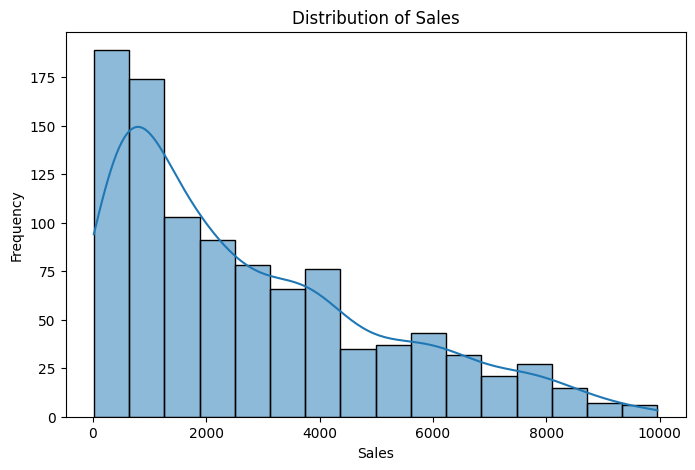

In [ ]:
# Distribution of Sales (Target Variable)
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Sales'], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

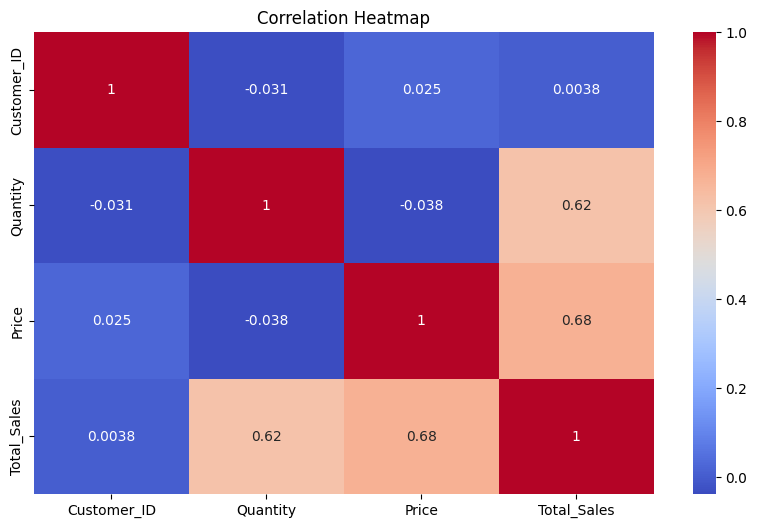

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

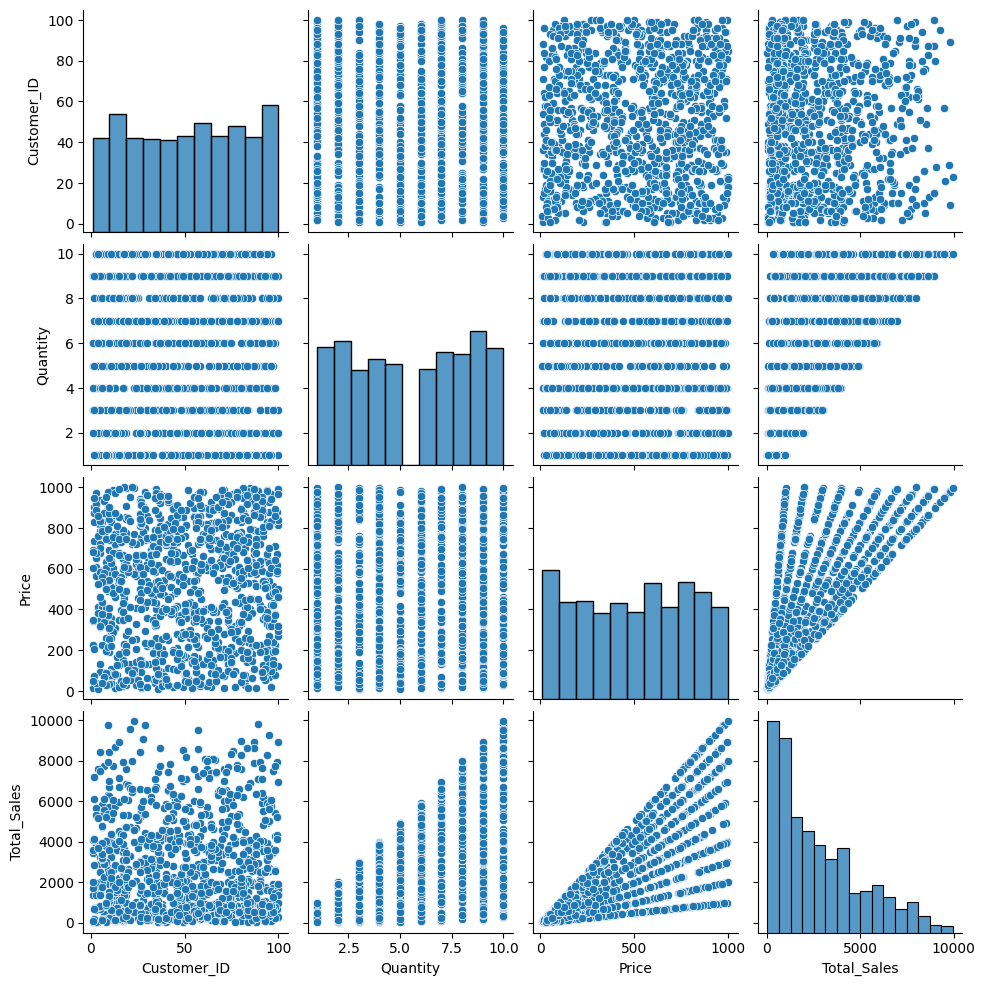

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
sns.pairplot(numeric_df)
plt.show()

In [ ]:
# Define Features (X) and Target (y)

# Drop non-predictive columns (Invoice_ID, Date) and the target variable (Total_Sales)
X = df.drop(['Total_Sales', 'Invoice_ID', 'Date'], axis=1)
y = df['Total_Sales']

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=['Product_Name', 'Category'], drop_first=True)

X.head(), y.head()

(   Customer_ID  Quantity   Price  Product_Name_Bread  Product_Name_Curtains  \
 0           35         7  360.68               False                  False   
 1           34         6  128.33               False                  False   
 2           97         2  515.10               False                  False   
 3            2         1  733.72               False                  False   
 4          100         2  815.41               False                  False   
 
    Product_Name_Cushion  Product_Name_Dress  Product_Name_Dumbbells  \
 0                 False               False                   False   
 1                 False               False                   False   
 2                 False               False                   False   
 3                 False               False                   False   
 4                 False               False                    True   
 
    Product_Name_Eggs  Product_Name_Football  ...  Product_Name_T-Shirt  \
 0       

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 31), (200, 31))

In [ ]:
# Scale the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[-1.41529026,  0.82653101, -0.55413215, -0.1796053 , -0.19044535,
        -0.16815955, -0.21707238, -0.22331316, -0.22331316, -0.19738551,
        -0.22941573, -0.22331316, -0.19738551, -0.226381  , -0.21068086,
         5.45611865, -0.19738551, -0.21707238, -0.19738551, -0.21068086,
        -0.19044535, -0.20742414, -0.21389632, -0.1796053 , -0.1720495 ,
        -0.226381  , -0.18689261,  1.97686   , -0.51752183, -0.47248449,
        -0.49217479],
       [-0.76597657, -1.56056216, -0.2853565 , -0.1796053 , -0.19044535,
        -0.16815955, -0.21707238, -0.22331316, -0.22331316, -0.19738551,
        -0.22941573, -0.22331316, -0.19738551, -0.226381  , -0.21068086,
        -0.18328047, -0.19738551, -0.21707238, -0.19738551, -0.21068086,
        -0.19044535, -0.20742414,  4.67516233, -0.1796053 , -0.1720495 ,
        -0.226381  , -0.18689261,  1.97686   , -0.51752183, -0.47248449,
        -0.49217479],
       [ 0.05420915,  0.82653101, -0.03847193, -0.1796053 , -0.19044535,
       

In [ ]:
# Train the Linear Regression Model

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training completed successfully.")

Model training completed successfully.


In [ ]:
# Predict on test data

y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 763650.7140169058
Root Mean Squared Error: 873.871108354605
R² Score: 0.8691024681052041


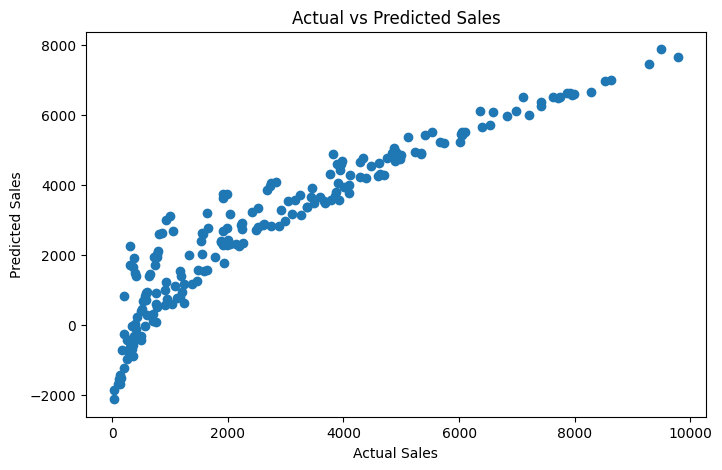

In [ ]:
# Plot Actual vs Predicted Sales

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [ ]:
# Save the trained model

import joblib

joblib.dump(model, "Retail_Sales_Model.joblib")
print("Model Saved Successfully!")

Model Saved Successfully!


In [ ]:
# Predict sales for one sample row

sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Input Data:\n", sample)
print("\nPredicted Sales:", prediction[0])
print("Actual Sales:", y_test.iloc[0])

Input Data:
      Customer_ID  Quantity   Price  Product_Name_Bread  Product_Name_Curtains  \
521           13         2  770.12               False                   True   

     Product_Name_Cushion  Product_Name_Dress  Product_Name_Dumbbells  \
521                 False               False                   False   

     Product_Name_Eggs  Product_Name_Football  ...  Product_Name_T-Shirt  \
521              False                  False  ...                 False   

     Product_Name_Tablet  Product_Name_Tennis Racket  Product_Name_Vase  \
521                False                       False              False   

     Product_Name_Wall Art  Product_Name_Yoga Mat  Category_Electronics  \
521                  False                  False                 False   

     Category_Groceries  Category_Home Decor  Category_Sports  
521               False                 True            False  

[1 rows x 31 columns]

Predicted Sales: 2406.6108136040257
Actual Sales: 1540.24


Project Summary
Project Title: Retail Sales Prediction
Objective:

To build a machine learning model that predicts retail sales based on given features.

Steps Performed in the Project
1. Data Loading

Dataset imported from YBI Foundation GitHub

Stored into a DataFrame

2. Data Cleaning & Understanding

Checked dataset shape

Verified missing values

Viewed summary statistics

Understood the feature types

3. Exploratory Data Analysis (EDA)

Distribution plot for Sales

Correlation heatmap

Pairplot of features

4. Feature Engineering

Defined Features (X)

Selected Target (y = Sales)

Train-test split

Applied standard scaling

5. Model Building

Used Linear Regression

Trained on scaled training data

6. Model Evaluation

Using test data:

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R² Score

Created Actual vs Predicted scatter plot

7. Model Saving

Saved the trained model using joblib

8. Sample Prediction

Tested prediction on a sample row

Displayed input, predicted, and actual values

Conclusion

This project successfully demonstrates how to build a machine learning model to predict retail sales using Linear Regression.
The model provides a good baseline and can be extended using more advanced algorithms.
The workflow includes data loading, preprocessing, visualization, modeling, evaluation, and deployment preparation.

Tools & Technologies Used

Google Colab



Python

Pandas, NumPy

Matplotlib, Seaborn

Scikit-Learn

Joblib